In [265]:
wd=getwd()

In [6]:
setwd("/home/alonso/PruebaOPI")

In [2]:
# Los siguientes comandos borran la memoria antes de ejecutar el programa
# desde el inicio
rm(list=ls())
#gc()

In [212]:
library(plyr)

In [8]:
# Cargando los datos de Ecobici:
table1=read.csv("2017-04.csv")
table2=read.csv("2017-05.csv")
table3=read.csv("2017-06.csv")

In [9]:
#Transformando las tablas a DataFrames
df1=as.data.frame(table1)
df2=as.data.frame(table2)
df3=as.data.frame(table3)

In [77]:
# Juntamos todos los dataframes en uno solo que abarque los tres meses:
df=rbind(rbind(df1,df2),df3)

[1] 2431474       9

In [ ]:
# Lo siguiente hace que R reconozca como fechas nuestras columnas de Fecha_Retiro y Fecha_Arribo
df$Fecha_Retiro=as.Date(as.character(df$Fecha_Retiro),format="%d/%m/%Y")
df$Fecha_Arribo=as.Date(as.character(df$Fecha_Arribo),format="%d/%m/%Y")

In [136]:
# Notese que hay dos datos anomalos. Las fechas de retiro y arribo no tienen sentido. Los eliminaremos de la tabla:
subset(df,Fecha_Retiro < "2017-03-31" | Fecha_Arribo < Fecha_Retiro | Fecha_Arribo > "2017-07-01")

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
572486,M,30,3094,18,2015-11-30,17:18:51,1002,2017-04-25,19:27:17
1038687,M,37,8364,170,2017-03-15,20:31:01,224,2017-05-12,17:05:16


In [137]:
#Los eliminamos escogiendo los elementos de df que no presentan esos problemas
df=subset(df,Fecha_Retiro >="2017-03-31")

# Histograma de las horas de retiro de bicicletas:

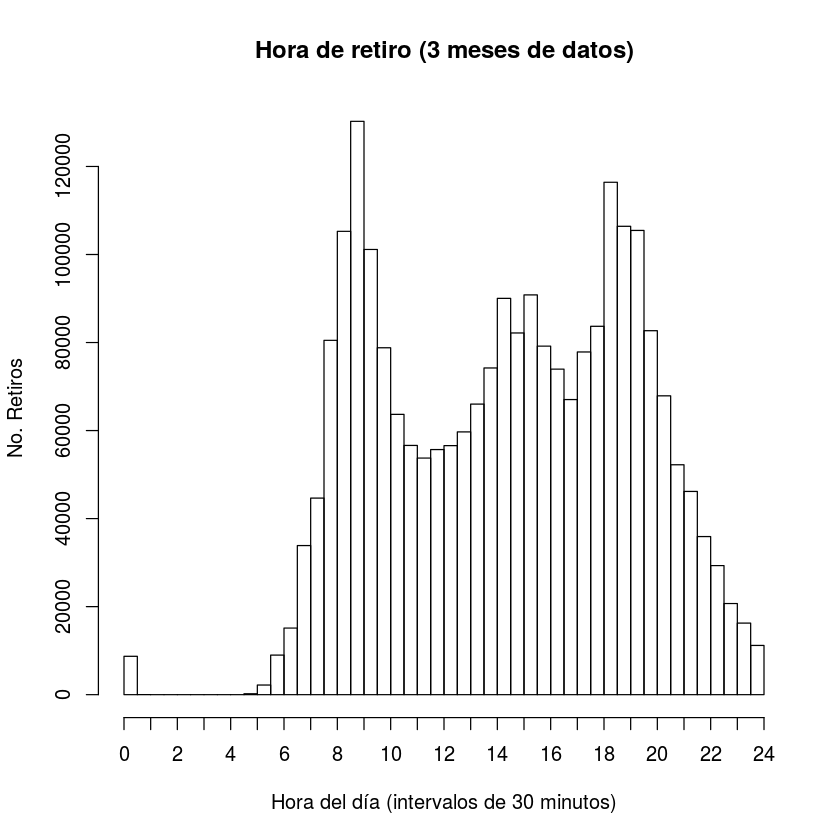

In [223]:
HoursR=strptime(df$Hora_Retiro,format="%H:%M:%S")$hour
MinutesR=strptime(df$Hora_Retiro,format="%H:%M:%S")$min
HourR=HoursR+MinutesR/60
#halfHours <- ifelse(Minute < 30, 0, 30)

hist(HourR,xlim=c(0,24),main="Hora de retiro (3 meses de datos)",breaks=seq(0,24,0.5),axes=F,xlab="Hora del día (intervalos de 30 minutos)",ylab="No. Retiros")
axis(2)
axis(1, at=seq(0,24,1))

# Histograma de las horas de arribo de las bicicletas:

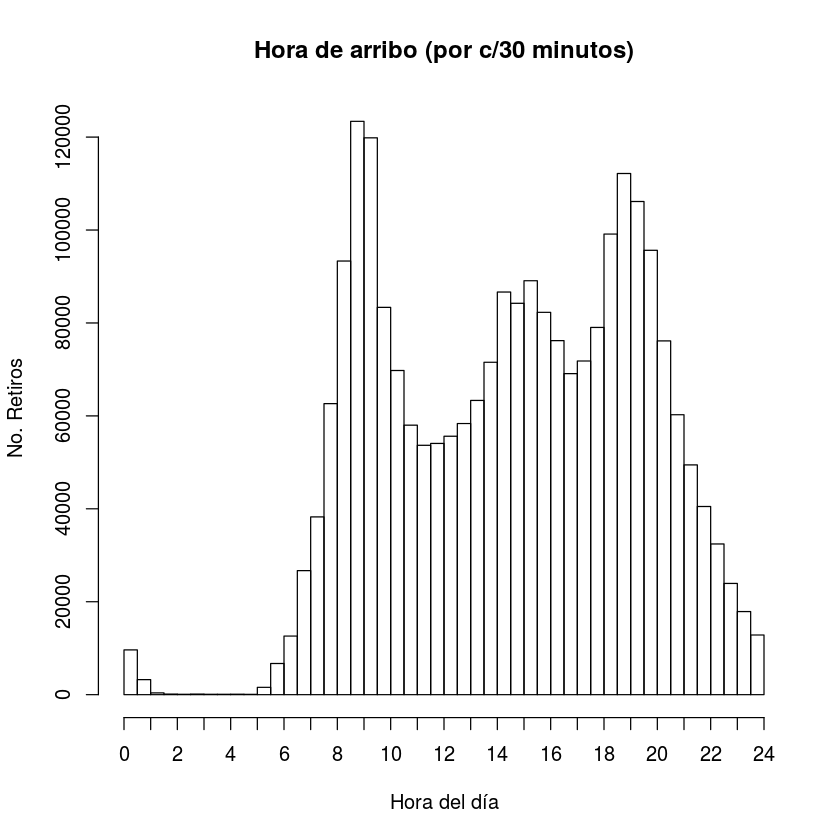

In [140]:
HoursA=strptime(df$Hora_Arribo,format="%H:%M:%S")$hour
MinutesA=strptime(df$Hora_Arribo,format="%H:%M:%S")$min
HourA=HoursA+MinutesA/60
#halfHours <- ifelse(Minute < 30, 0, 30)

hist(HourA,xlim=c(0,24),main="Hora de arribo (3 meses de datos)",breaks=seq(0,24,0.5),axes=F,xlab="Hora del día (intervalos de 30 minutos)",ylab="No. Retiros")
axis(2)
axis(1, at=seq(0,24,1))

## Visualmente se aprecia que los horarios de mayor afluencia de retiros y arribos de bicicletas a las estaciones son 08:00-9:30 y 18:00-20:00, seguidos del intervalo 14:00-16:00, correspondiendo (intuitivamente) con las horas de ingreso de los trabajadores, sus horas de salida, y la hora usual de la comida, respectivamente.

# Para encontrar las estaciones con mas retiros, arribos y sus tendencias, comenzamos contando el numero de retiros y arribos por estacion por dia, las siguientes celdas efectuan lo anterior.

In [141]:
# Verificamos que todas las estaciones de las cuales salen bicicletas tambien hayan recibido bicicletas en algún 
# momento
Est_Ret=unique(df$Ciclo_Estacion_Retiro)
Est_Arr=unique(df$Ciclo_Estacion_Arribo)
setequal(Est_Ret,Est_Arr)

[1] TRUE

In [144]:
dfr=count(df,c('Ciclo_Estacion_Retiro','Fecha_Retiro')) #Retiros por estacion, por dia en un solo dataframe
dfa=count(df,c('Ciclo_Estacion_Arribo','Fecha_Arribo')) #Arribos por estacion, por dia en sun solo dataframe

In [145]:
dfa

Ciclo_Estacion_Arribo,Fecha_Arribo,freq
1,2017-04-01,139
1,2017-04-02,103
1,2017-04-04,282
1,2017-04-05,250
1,2017-04-06,241
1,2017-04-07,241
1,2017-04-08,125
1,2017-04-09,108
1,2017-04-10,221
1,2017-04-11,234


In [146]:
# Con esta celda obtengo dos listas, cada una conteniendo un dataframe por cada estacion (con el mismo nombre)
# tal que la dataframe de la estacion 44 contiene el registro de los retiros (arribos) por dia, ordenados por
# fecha. La lista es el resultado de separar el dataframe de la celda anterior por estacion.
out_R=split(dfr,dfr$Ciclo_Estacion_Retiro)
out_A=split(dfa,dfa$Ciclo_Estacion_Arribo)

# Para determinar si existe una tendencia se implementa la prueba no paramétrica de Cox-Stuart para tendencias. Se utiliza esta prueba pues a pesar su sencillez, es fácilmente implementable para secuencias numéricas ordenadas y no depende de la distribución de estos, o de la razón a la cual crezcan (e.g. linealmente, cuadráticamente,exponencialmente, etc. ).

In [148]:
# Defino una funcion que efectua una prueba no parametrica de tendencia (Cox-Stuart) para determinar la tendencia
# de los datos (ordenados por tiempo), los valores de retorno son [tendencia] "Creciente", "Decreciente", 
# "NoSignificativa" y "InsufDatos" (autoexplicativo), además del p-value de la prueba. La prueba tiene un nivel de 
# confianza del 95%
CoxStuartTestTrend <- function(dataframe){
    alpha=0.05
    n=nrow(dataframe)
    if(n>=20){
        if(n%%2==0){
            signs=sign(dataframe[((n/2)+1):n,3]-dataframe[1:(n/2),3])
            signs=signs[signs!=0]
            N=length(signs)
            T=length(signs[signs>0])
            #L=length(signs[signs<0])
            L_value=pbinom(T,N,0.5,lower.tail=TRUE)
            U_value=1-pbinom(T-1,N,0.5,lower.tail=TRUE)
            p_value=2*min(L_value,U_value)
            if(p_value<alpha){
                if(U_value<L_value){
                    return(data.frame("p"=p_value,"Tendencia"="Creciente"))
                }
                else{
                    return(data.frame("p"=p_value,"Tendencia"="Decreciente"))
                }
            }
            else return(data.frame("p"=p_value,"Tendencia"="NoSignificativa"))
        }
        else{
            signs=sign(dataframe[(((n+1)/2)+1):n,3]-dataframe[1:((n-1)/2),3])
            signs=signs[signs!=0]
            N=length(signs)
            T=length(signs[signs>0])
            #L=length(signs[signs<0])
            L_value=pbinom(T,N,0.5,lower.tail=TRUE)
            U_value=1-pbinom(T-1,N,0.5,lower.tail=TRUE)
            p_value=2*min(L_value,U_value)
            if(p_value<alpha){
                if(U_value<L_value){
                    return(data.frame("p"=p_value,"Tendencia"="Creciente"))
                }
                else{
                    return(data.frame("p"=p_value,"Tendencia"="Decreciente"))
                }
            }
            else return(data.frame("p"=p_value,"Tendencia"="NoSignificativa"))
        }
    }
    else return(data.frame("p"=NaN,"Tendencia"="InsufDatos"))
}

In [149]:
# Aplicamos la funcion de la prueba de Cox-Stuart a cada elemento de la lista conteniendo los registros por estacion
lista_tendencias_retiro=lapply(names(out_R), function(x) CoxStuartTestTrend(out_R[[x]]))
lista_tendencias_arribo=lapply(names(out_A), function(x) CoxStuartTestTrend(out_A[[x]]))

In [150]:
names(lista_tendencias_retiro)=names(out_R)
names(lista_tendencias_arribo)=names(out_A)

In [151]:
# Convertimos la lista de dataframes obtenida a un único dataframe (uno para arribos y uno para retiros)
df_tendencias_retiro <- ldply(lista_tendencias_retiro, data.frame)
df_tendencias_arribo <- ldply(lista_tendencias_arribo, data.frame)

In [152]:
# Creamos una nueva dataframe con el promedio y desviación estándar del número de retiros (arribos) para cada estacion
df_promedios_retiro=ldply(lapply(out_R, function(x) data.frame("promedio"=mean(x[,3]),"desv_est"=sd(x[,3]))),data.frame)
df_promedios_arribo=ldply(lapply(out_A, function(x) data.frame("promedio"=mean(x[,3]),"desv_est"=sd(x[,3]))),data.frame)

In [153]:
# Unimos las dataframes de tendencias de arribo y retiro, así como las dataframes de promedios de arribo y 
# promedios de retiro
df_promedios=merge(df_promedios_retiro,df_promedios_arribo,by='.id')
names(df_promedios)=c("Estacion","Prom_Retiros_Dia","DesvEst_Retiros","Prom_Arribos_Dia","DesvEst_Arribos")
df_tendencias=merge(df_tendencias_retiro,df_tendencias_arribo,by='.id')
names(df_tendencias)=c("Estacion","pval_Retiros_Test","Tendencia_Retiros","pval_Arribos","Tendencia_Arribos")
df_resumen=merge(df_promedios,df_tendencias,by='Estacion')

# Creamos una dataframe (df_resumen) que resuma toda la información importante de cada estación:

In [154]:
# Unimos lo anterior en una dataframe que resume todo lo anterior: para cada estación se tiene el número promedio
# de retiros, la desviación estándar, el número promedio de arribos, su d.e., el p-value para la prueba de tendencia
# de retiros, la tendencia de retiros (en caso de haber), el p-value para la prueba de arribos y la tendencia de arribos.
df_resumen=transform(df_resumen,Estacion=as.integer(Estacion))
df_resumen=df_resumen[order(df_resumen$Estacion),]
df_resumen

,Estacion,Prom_Retiros_Dia,DesvEst_Retiros,Prom_Arribos_Dia,DesvEst_Arribos,pval_Retiros_Test,Tendencia_Retiros,pval_Arribos,Tendencia_Arribos
1,1,204.57143,76.54921,210.97778,75.10606,0.3712980345,NoSignificativa,0.035697804,Creciente
114,2,93.53846,36.26670,88.57778,35.68620,0.0487667659,Creciente,0.048766766,Creciente
224,3,115.72527,59.50090,101.05556,49.16982,0.5514843298,NoSignificativa,0.371298034,NoSignificativa
333,4,82.23077,35.70374,93.81111,39.32489,0.2912152365,NoSignificativa,1.000000000,NoSignificativa
397,5,75.64835,32.41343,78.28889,33.51211,0.2326931919,NoSignificativa,0.551484330,NoSignificativa
408,6,112.19780,51.15667,114.96667,53.01356,0.7659918242,NoSignificativa,0.126289474,NoSignificativa
419,7,122.51111,58.76295,129.35556,62.01147,0.1351564508,NoSignificativa,0.291215237,NoSignificativa
430,8,68.03297,33.86294,62.18889,29.32840,0.1351564508,NoSignificativa,0.035697804,Creciente
441,9,92.43333,37.90024,99.40000,43.57966,0.0724542602,NoSignificativa,0.096141754,NoSignificativa
2,10,133.70330,57.29233,114.57778,49.59181,0.3712980345,NoSignificativa,0.651587827,NoSignificativa


# Encontramos las estaciones con tendencia de retiros creciente (con 95% de confianza):

In [161]:
df_retiros_crecientes=subset(df_resumen, Tendencia_Retiros=="Creciente")
df_retiros_crecientes[,c(1:3,6,7)]

,Estacion,Prom_Retiros_Dia,DesvEst_Retiros,pval_Retiros_Test,Tendencia_Retiros
114,2,93.53846,36.266700,0.0487667659,Creciente
70,16,125.95604,67.201341,0.0008240824,Creciente
92,18,195.96703,88.359298,0.0356978036,Creciente
147,23,151.14444,73.278530,0.0356978036,Creciente
322,39,91.65934,38.434423,0.0356978036,Creciente
378,44,57.63855,22.625573,0.0022214338,Creciente
389,45,106.23864,48.686186,0.0226288412,Creciente
395,48,57.53333,20.859185,0.0356978036,Creciente
413,64,166.56044,61.821824,0.0160943600,Creciente
440,89,26.41111,8.334165,0.0024589003,Creciente


# No hay estaciones con tendencia de retiro decreciente (con 95% de confianza):

In [164]:
df_retiros_decrecientes=subset(df_resumen, Tendencia_Retiros=="Decreciente")
df_retiros_decrecientes[,c(1:3,6,7)]

Estacion,Prom_Retiros_Dia,DesvEst_Retiros,pval_Retiros_Test,Tendencia_Retiros


# Encontramos las estaciones con tendencia de arribos creciente (con 95% de confianza):

In [167]:
df_arribos_creciente=subset(df_resumen, Tendencia_Arribos=="Creciente")
df_arribos_creciente[,c(1,4,5,8,9)]

,Estacion,Prom_Arribos_Dia,DesvEst_Arribos,pval_Arribos,Tendencia_Arribos
1,1,210.97778,75.106064,0.035697804,Creciente
114,2,88.57778,35.686203,0.048766766,Creciente
430,8,62.18889,29.328398,0.035697804,Creciente
48,14,113.53333,53.056934,0.016094360,Creciente
70,16,128.06667,68.432990,0.006608823,Creciente
92,18,202.17778,90.852217,0.006608823,Creciente
147,23,145.58889,70.514943,0.016094360,Creciente
169,25,164.11111,54.521503,0.016094360,Creciente
180,26,100.24444,41.044594,0.016094360,Creciente
378,44,50.60976,18.490409,0.006426576,Creciente


# De igual manera no hay estaciones con tendencia de arribos decreciente (con 95% de confianza):

In [168]:
df_arribos_decreciente=subset(df_resumen, Tendencia_Arribos=="Decreciente")
df_arribos_decreciente[,c(1,4,5,8,9)]

Estacion,Prom_Arribos_Dia,DesvEst_Arribos,pval_Arribos,Tendencia_Arribos


# Hay 19 estaciones con retiros y arribos crecientes:

In [169]:
df_creciente=subset(df_resumen, Tendencia_Retiros=="Creciente" & Tendencia_Arribos=="Creciente")
df_creciente

,Estacion,Prom_Retiros_Dia,DesvEst_Retiros,Prom_Arribos_Dia,DesvEst_Arribos,pval_Retiros_Test,Tendencia_Retiros,pval_Arribos,Tendencia_Arribos
114,2,93.53846,36.266700,88.57778,35.686203,0.0487667659,Creciente,0.048766766,Creciente
70,16,125.95604,67.201341,128.06667,68.432990,0.0008240824,Creciente,0.006608823,Creciente
92,18,195.96703,88.359298,202.17778,90.852217,0.0356978036,Creciente,0.006608823,Creciente
147,23,151.14444,73.278530,145.58889,70.514943,0.0356978036,Creciente,0.016094360,Creciente
378,44,57.63855,22.625573,50.60976,18.490409,0.0022214338,Creciente,0.006426576,Creciente
389,45,106.23864,48.686186,100.05682,45.134628,0.0226288412,Creciente,0.022628841,Creciente
413,64,166.56044,61.821824,180.24444,60.897835,0.0160943600,Creciente,0.035697804,Creciente
7,102,26.23077,8.136443,28.57778,8.025210,0.0002470878,Creciente,0.013718185,Creciente
33,126,73.34375,28.780626,76.28125,34.696630,0.0200616070,Creciente,0.020061607,Creciente
107,193,78.00000,38.136656,47.44444,20.297291,0.0356978036,Creciente,0.006608823,Creciente


In [170]:
# Numero de estaciones con arribos y retiros crecientes
nrow(df_creciente)

[1] 19

# Mostramos gráficamente la tendencia a la alza eligiendo al azar una estación con retiros y arribos crecientes, y graficando los retiros y arribos como función de la fecha:

In [209]:
# Ejecutando esta celda se elige una estacion aleatoria, las siguientes dos celdas grafican 
# el uso de estas como funcion del tiempo, cada vez que se ejecute esta celda cambiara la 
# estacion graficada en las siguientes dos celdas

Estacion_Aleatoria=as.character(sample(df_creciente$Estacion,1))
df_graficaR=out_R[[Estacion_Aleatoria]]
df_graficaA=out_A[[Estacion_Aleatoria]]

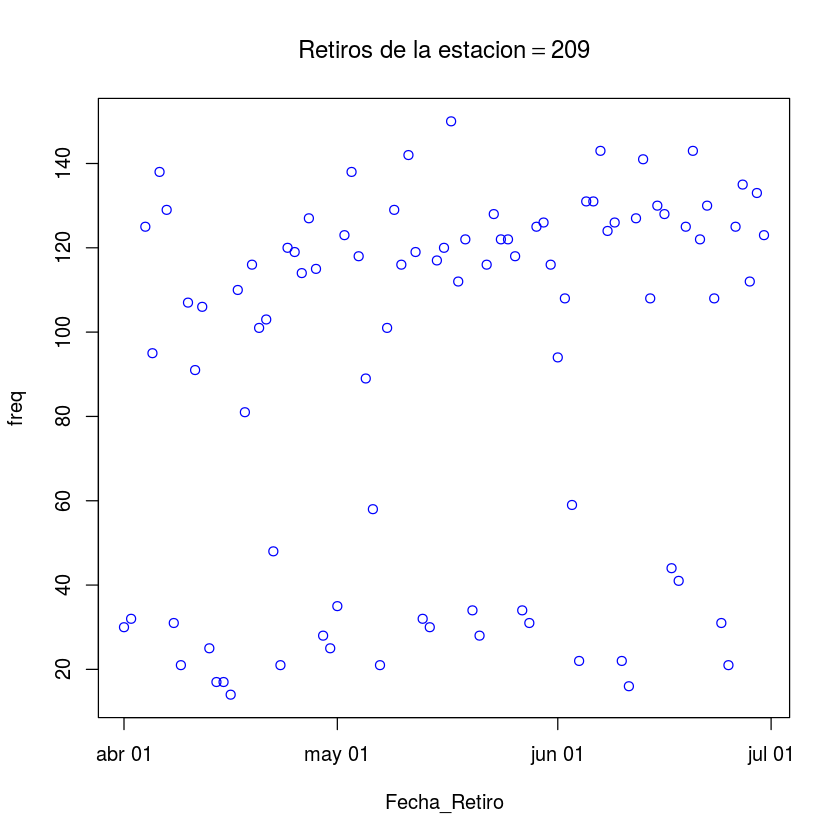

In [210]:
# Grafica de retiros
plot(df_graficaR[,2:3], col='blue', main=bquote("Retiros de la estacion" == .(Estacion_Aleatoria)))

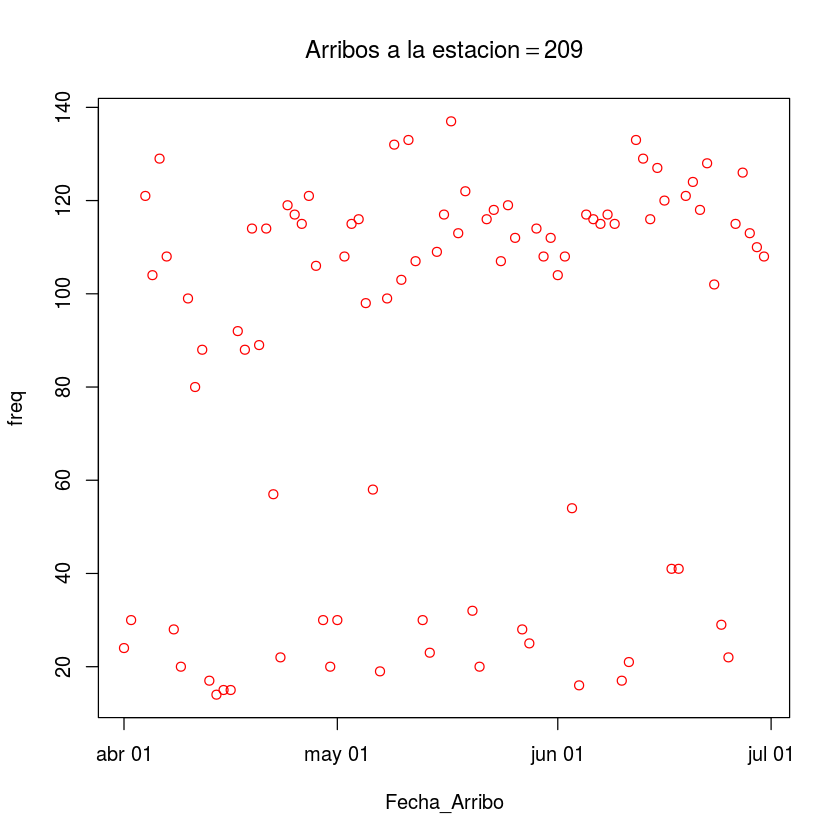

In [211]:
# Grafica de arribos
plot(df_graficaA[,2:3], col='red',  main=bquote("Arribos a la estacion" == .(Estacion_Aleatoria))) 

# Encontramos las estaciones con mayor y menor número de retiros y arribos promedio al día. El número de estaciones deseadas se puede controlar manipulando la variable N(=10):

In [217]:
N=10
df_max_retiros=head(df_resumen[order(-df_resumen$Prom_Retiros_Dia),],N) # N con mas retiros promedio
df_min_retiros=head(df_resumen[order(df_resumen$Prom_Retiros_Dia),],N) # N con menos retiros promedio
df_max_arribos=head(df_resumen[order(-df_resumen$Prom_Arribos_Dia),],N) # N con mas arribos promedio
df_min_arribos=head(df_resumen[order(df_resumen$Prom_Arribos_Dia),],N) # N con menos arribos promedio

## Las N con mayor numero de retiros, con sus retiros promedio, son:

In [218]:
df_max_retiros[,c(1,2)]

,Estacion,Prom_Retiros_Dia
191,27,315.1304
193,271,214.3778
1,1,204.5714
92,18,195.9670
169,25,168.0778
59,15,167.8901
126,21,167.8022
413,64,166.5604
290,36,165.0440
345,41,164.4783


 ## Las N con mayor numero de arribos, con sus arribos promedio, son:

In [219]:
df_max_arribos[,c(1,4)]

,Estacion,Prom_Arribos_Dia
191,27,326.1000
187,266,237.3000
1,1,210.9778
92,18,202.1778
367,43,187.0667
193,271,181.9889
413,64,180.2444
394,47,170.2111
290,36,167.6000
133,217,165.6111


## Se observa que la estación 27 es por mucho la más concurrida, seguida de las estaciones 1, 18, 64 y 36, para averiguar por qué me gustaría ubicarlas espacialmente (pero no sé si llegue tan lejos)

In [220]:
df

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
1,M,22,3834,278,2017-04-01,0:00:09,375,2017-04-01,0:16:05
2,M,35,8435,69,2017-04-01,0:00:12,62,2017-04-01,0:08:07
3,M,38,1704,110,2017-04-01,0:01:17,264,2017-04-01,0:24:14
4,M,26,2689,398,2017-04-01,0:01:21,357,2017-04-01,0:07:01
5,M,26,1977,74,2017-04-01,0:01:28,258,2017-04-01,0:11:04
6,M,37,6770,149,2017-04-01,0:01:41,124,2017-04-01,0:22:27
7,M,27,7723,74,2017-04-01,0:01:49,258,2017-04-01,0:11:09
8,M,28,2061,138,2017-04-01,0:01:58,33,2017-04-01,0:13:36
9,M,30,7921,47,2017-04-01,0:02:08,79,2017-04-01,0:12:23
10,M,30,9341,276,2017-04-01,0:02:16,408,2017-04-01,0:19:27


# Comenzamos a crear la matriz de incidencias:

## Contamos cuántos elementos de nuestro dataframe "df" tienen el mismo origen y destino y los guardamos en el dataframe "dfi":

In [231]:
ddfi=count(df,c('Ciclo_Estacion_Retiro','Ciclo_Estacion_Arribo'))
dfi

Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo,freq
1,1,460
1,2,251
1,3,129
1,4,373
1,5,297
1,6,199
1,7,326
1,8,27
1,9,445
1,10,168


In [252]:
# Creo la matrix de incidencias (llena de ceros) y le pongo los nombres de renglones y columnas de las estaciones
MI=matrix(0L,nrow=length(unique(dfi$Ciclo_Estacion_Retiro)),ncol=length(unique(dfi$Ciclo_Estacion_Arribo)))
rownames(MI)=unique(dfi$Ciclo_Estacion_Retiro)
colnames(MI)=unique(dfi$Ciclo_Estacion_Retiro)

### Con el siguiente ciclo leo el dataframe de incidencia y lo voy acomodando en la matriz de incidencias (que hasta este momento estaba llena de ceros). Sí, me doy cuenta que esto es ineficiente y raya en el hardcodeo.

In [253]:
for (i in seq(1:nrow(dfi))){
    MI[as.character(dfi[i,1]),as.character(dfi[i,2])]=dfi[i,3]
}

# La matriz de incidencias es:

In [254]:
MI

,1,2,3,4,5,6,7,8,9,10,⋯,445,446,447,448,449,450,451,452,1001,1002
1,460,251,129,373,297,199,326,27,445,168,⋯,1,1,19,9,46,17,38,21,0,2
2,183,253,45,70,27,160,66,10,367,19,⋯,0,1,14,14,25,52,19,1,0,1
3,120,91,193,71,65,79,184,31,60,156,⋯,0,0,6,34,7,49,18,5,0,3
4,493,73,35,207,40,115,75,37,45,56,⋯,0,0,17,1,14,3,11,5,0,2
5,299,44,22,70,172,50,103,13,78,34,⋯,0,1,8,2,15,10,19,9,0,1
6,260,103,16,212,104,357,118,24,135,35,⋯,1,1,6,2,9,15,15,4,0,1
7,410,109,21,102,71,204,961,29,255,39,⋯,0,1,22,2,24,13,11,65,0,0
8,48,9,20,31,12,22,72,128,19,59,⋯,0,1,0,12,28,24,0,8,0,1
9,343,146,19,48,28,84,97,16,255,18,⋯,0,1,5,2,16,27,26,4,0,0
10,225,57,216,89,53,111,96,47,62,282,⋯,0,1,11,13,10,72,11,6,0,2


In [277]:
?scale

# Lo siguiente crea el heatmap que se obtiene de la matriz de incidencia; el heatmap se exporta a mi actual carpeta en uso, por lo que habría que modificar el directorio.

In [280]:
png("/home/alonso/PruebaOPI/heatmap.png",units='px',width=2000,height=2000,pointsize=12,res=72)
heatmap(MI,Rowv=NA,Colv=NA,col=colorRampPalette(c('yellow','blue'))(10))
dev.off()

png 
  2

## Analizando visualmente el heatmap --la matriz de incidencias-- se pueden observar esencialmente dos tipos de "cúmulos" (regiones oscuras o de mayor actividad); hay cúmulos que viven sobre la diagonal (identidad), y cúmulos que viven en las afueras de ella. Suponiendo que las estaciones de numeración cercana son cercanas entre ellas, los cúmulos alrededor de la identidad corresponden a zonas geográficas relativamente bien delimitadas por el sistema de estaciones, como por ejemplo: Zona Roma-Condesa, Zona Chapultepec-Reforma, Zona Coyoacán, etc., así, estos clusters representan la afluencia de viajes dentro de una misma zona, e.g. viajes entre BiciEstaciones dentro de la Zona Roma-Condesa. Los cúmulos fuera de la identidad representan los viajes de una zona geográfica a otra, e.g. los viajes de las estaciones de la Zona Roma-Condesa a la Zona Reforma-Chapultepec; el hecho de que el heatmap sea, a grandes razgos, simétrico con respecto a la identidad, evidencia lo anterior: alguien que se traslada de la Condesa a Reforma para ir al trabajo tendrá que efectuar un viaje en la dirección opuesta para regresar de éste. Se puede decir que los dos tipos de clusters anteriormente descritos categorizan la "correlación" que hay entre estaciones.

## Las anteriores inferencias son puramente intuitivas, si bien --creo-- razonables; su corroboración estadística requeriría de la implementación de algún algoritmo de inteligencia artificial y análisis de los datos, o de la observación geográfica de la ubicación de las estaciones --lo cual sería también un análisis visual--, pero el tiempo apremia y no me parece factible poder implementar lo anterior.